In [ ]:
import numpy as np
import pandas as pd

# Distance Metrics

## Euclidean Distance

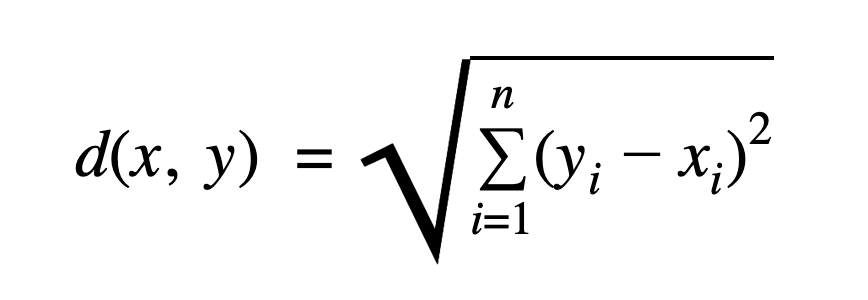

In [ ]:
# The code for euclidean distance is as follow
def euclidean_distance(x, y):
  return np.sqrt(np.sum((x - y) ** 2))

In [ ]:
# Example
x = np.array((1, 2, 3))
y = np.array((1, 1, 1))

print(f"x = {x}, y = {y}\nEuclidean distance = {euclidean_distance(x,y)}")

x = [1 2 3], y = [1 1 1]
Euclidean distance = 2.23606797749979


## Cosine Similarity

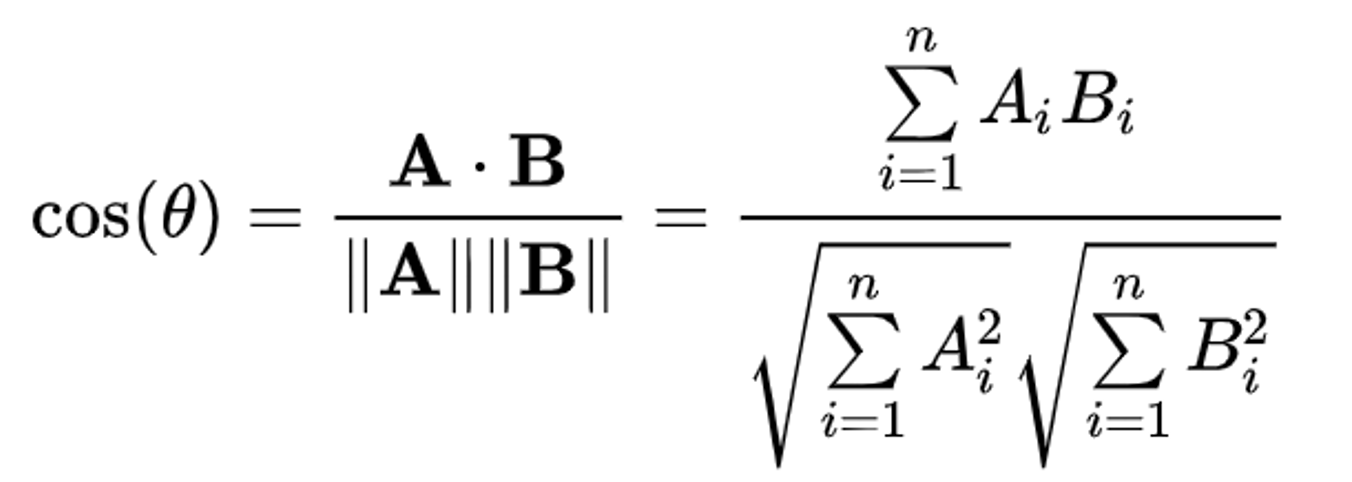

In [ ]:
# The code for cosine distance is as follow
def cosine_distance(x, y):
  return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [ ]:
# Example
x = np.array([2,1,2,3,2,9])
y = np.array([3,4,2,4,5,5])

print(f"x = {x}, y = {y}\nEuclidean distance = {cosine_distance(x,y)}")

x = [2 1 2 3 2 9], y = [3 4 2 4 5 5]
Euclidean distance = 0.8188504723485274


# Machine learning implementation (using KNN and Centroid Based Classifier)

## KNN using Euclidean distance

In [ ]:
class KNN_euclidean:
  def __init__(self, k = 3):
    # Defining amount of k-neighbors
    self.k = k

  def fit(self, x_train, y_train):
    # Saving dataset to the algorithm
    self.x_train = x_train
    self.y_train = y_train
  # Using previous distance documentation

  def euclidean_distance(self, x, y):
    return np.sqrt(np.sum((x - y) ** 2))

  def predict(self, x_test):
    # Labels predicting
    predictions = [self._predict(x) for x in x_test]
    return np.array(predictions)

  def _predict(self, x):
    # Calculate distances
    distances = [self.euclidean_distance(x, x_train_) for x_train_ in self.x_train]
    # Retrieve indices of k nearest neighbors
    k_indices = np.argsort(distances)[:self.k]
    # Get the labels of the k nearest neighbors
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    # Manually count the occurrences of each label
    label_counts = {}
    for label in k_nearest_labels:
      if label in label_counts:
        label_counts[label] += 1
      else:
        label_counts[label] = 1

    # Find the label with the highest count (majority voting)
    majority_label = max(label_counts, key=label_counts.get)
    return majority_label

In [ ]:
# Testing with canvas's dataset of existing email
x = [
    np.array([50, 5, 200]),
    np.array([10, 1, 500]),
    np.array([40, 4, 300]),
    np.array([5, 0, 600]),
    np.array([30, 3, 250])
]
y = np.array([1, 0, 1, 0, 1])
new_email = np.array([35, 2, 400])

In [ ]:
knn_eu = KNN_euclidean(k = 3)
knn_eu.fit(np.array(x), y)

In [ ]:
prediction = knn_eu.predict(np.array([new_email]))
print(f"Predicted class for {new_email}: {prediction}")
print('Spam') if prediction == 1 else print('Not Spam')

Predicted class for [ 35   2 400]: [1]
Spam


## KNN using Cosine distance

In [ ]:
class KNN_cosine:
  def __init__(self, k = 3):
    # Defining amount of k-neighbors
    self.k = k

  def fit(self, x_train, y_train):
    # Saving dataset to the algorithm
    self.x_train = x_train
    self.y_train = y_train
  # Using previous distance documentation

  def cosine_similarity(self, x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

  def predict(self, x_test):
    # Labels predicting
    predictions = [self._predict(x) for x in x_test]
    return np.array(predictions)

  def _predict(self, x):
    # Calculate distances
    similarities  = [self.cosine_similarity(x, x_train_) for x_train_ in self.x_train]
    # Retrieve indices of k nearest neighbors
    k_indices = np.argsort(similarities)[-self.k:]
    # Get the labels of the k nearest neighbors
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    # Manually count the occurrences of each label
    label_counts = {}
    for label in k_nearest_labels:
      if label in label_counts:
        label_counts[label] += 1
      else:
        label_counts[label] = 1

    # Find the label with the highest count (majority voting)
    majority_label = max(label_counts, key=label_counts.get)
    return majority_label

In [ ]:
knn_cs = KNN_cosine(k = 3)
knn_cs.fit(x, y)

In [ ]:
prediction = knn_cs.predict(np.array([new_email]))
print(f"Predicted class for {new_email}: {prediction}")
print('Spam') if prediction == 1 else print('Not Spam')

Predicted class for [ 35   2 400]: [1]
Spam


## Centroid Based Classifier using Cosine distance

In [ ]:
class CentroidClassifier_cosine():
  def __init__(self):
    self.centroids = {}

  def cosine_similarity(self, x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

  def fit(self, x_train, y_train):
    self.classes = np.unique(y_train)
    for a in self.classes:
      self.centroids[a] = np.mean(x_train[y_train == a], axis=0)

  def predict(self, x):
    predictions = []
    for x_ in x:
      similarities = {c: self.cosine_similarity(x_, centroid) for c, centroid in self.centroids.items()}
      predicted_class = max(similarities, key=similarities.get)
      predictions.append(predicted_class)
    return np.array(predictions)

In [ ]:
cc_cs = CentroidClassifier_cosine()
cc_cs.fit(np.array(x), y)

In [ ]:
prediction = cc_cs.predict(np.array([new_email]))
print(f"Predicted class for {new_email}: {prediction}")
print('Spam') if prediction == 1 else print('Not Spam')

Predicted class for [ 35   2 400]: [1]
Spam


## Centroid Based Classiffier using Eucliedan distance

In [ ]:
class CentroidClassifier_euclidean():
  def __init__(self):
    self.centroids = {}

  def euclidean_distance(self, x, y):
    return np.sqrt(np.sum((x - y) ** 2))

  def fit(self, x_train, y_train):
    self.classes = np.unique(y_train)
    for a in self.classes:
      self.centroids[a] = np.mean(x_train[y_train == a], axis=0)

  def predict(self, x):
    predictions = []
    for x_ in x:
      distances = {c: self.euclidean_distance(x_, centroid) for c, centroid in self.centroids.items()}
      predicted_class = min(distances, key=distances.get)
      predictions.append(predicted_class)
    return np.array(predictions)

In [ ]:
cc_eu = CentroidClassifier_euclidean()
cc_eu.fit(np.array(x), y)

In [ ]:
prediction = cc_eu.predict(np.array([new_email]))
print(f"Predicted class for {new_email}: {prediction}")
print('Spam') if prediction == 1 else print('Not Spam')

Predicted class for [ 35   2 400]: [1]
Spam


# Implementation with dataset

## Data resampling

In [ ]:
import random

In [ ]:
# K-fold data splitting
# Function to split dataset into k folds
def cross_validation_split(dataset, labels, n_folds):
    dataset_split = []
    dataset_copy = list(zip(dataset, labels))  # Pair features and labels
    random.shuffle(dataset_copy)  # Shuffle data before splitting
    fold_size = len(dataset) // n_folds # Determine size of each fold

    for _ in range(n_folds):
        fold = dataset_copy[:fold_size] # Select fold
        dataset_copy = dataset_copy[fold_size:] # Remove selected fold from dataset
        dataset_split.append(fold) # Append fold to list

    return dataset_split

In [ ]:
# Accuracy metric
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

def compute_precision(true_labels, predicted_labels):
    unique_classes = np.unique(true_labels)
    precision_scores = []

    for c in unique_classes:
        TP = sum((predicted_labels == c) & (true_labels == c))  # True Positives
        FP = sum((predicted_labels == c) & (true_labels != c))  # False Positives

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Avoid division by zero
        precision_scores.append(precision)

    return np.mean(precision_scores)  # Macro Precision

In [ ]:
def k_fold_cross_validation(model_class, X, y, k_neighbors=3, n_folds=5):
    folds = cross_validation_split(X, y, n_folds)
    accuracies = []
    precisions = []

    for i in range(n_folds):
        test_data = np.array([x for x, _ in folds[i]])
        test_labels = np.array([y for _, y in folds[i]])

        train_data = np.array([x for fold in folds[:i] + folds[i+1:] for x, _ in fold])
        train_labels = np.array([y for fold in folds[:i] + folds[i+1:] for _, y in fold])

        model = model_class() if model_class == CentroidClassifier_cosine or CentroidClassifier_euclidean else model_class(k_neighbors)
        model.fit(train_data, train_labels)
        predictions = model.predict(test_data)

        accuracy = np.mean(predictions == test_labels)
        accuracies.append(accuracy)

        precision = compute_precision(test_labels, predictions)
        precisions.append(precision)

        print(f"Fold {i+1} Accuracy: {accuracy:.4f} | Precision: {precision:.4f}")

    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)

    print(f"\nOverall Average Accuracy: {avg_accuracy:.4f}")
    print(f"Overall Average Precision: {avg_precision:.4f}")

    return avg_accuracy, avg_precision

## Dataset stuff

In [ ]:
# Dataset mounting
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stroke_data = pd.read_csv('/content/drive/My Drive/stroke_data_processed.csv')

In [ ]:
stroke_data

,age,avg_glucose_level,bmi,stroke,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051242,2.706450,1.001034e+00,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,0.785889,2.121652,4.615423e-16,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,1.626174,-0.004867,4.683922e-01,1,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0.255182,1.437473,7.152261e-01,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1.581949,1.501297,-6.358651e-01,1,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1.626174,-0.494481,4.615423e-16,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5105,1.670400,0.420922,1.442737e+00,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
5106,-0.363976,-0.511266,2.215582e-01,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
5107,0.343633,1.328375,-4.280049e-01,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
# Move target column to the end
stroke_data = stroke_data[[col for col in stroke_data.columns if col != 'stroke'] + ['stroke']]
stroke_data

,age,avg_glucose_level,bmi,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,gender_Male,ever_married_No,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1.051242,2.706450,1.001034e+00,1,0,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1
1,0.785889,2.121652,4.615423e-16,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
2,1.626174,-0.004867,4.683922e-01,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
3,0.255182,1.437473,7.152261e-01,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,1
4,1.581949,1.501297,-6.358651e-01,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1.626174,-0.494481,4.615423e-16,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
5105,1.670400,0.420922,1.442737e+00,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
5106,-0.363976,-0.511266,2.215582e-01,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
5107,0.343633,1.328375,-4.280049e-01,1,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
x = stroke_data.drop('stroke', axis = 1).copy()
y = stroke_data['stroke']

## Model testing (using K-fold Cross Validation)

In [ ]:
# KNN Cosine Similarity
for i in range(3, 8, 2):
  print(f"KNN (Cosine) With K = {i}")
  k_fold_cross_validation(KNN_cosine, np.array(x), y, k_neighbors=i, n_folds=5)

KNN (Cosine) With K = 3
Fold 1 Accuracy: 0.9412 | Precision: 0.5207
Fold 2 Accuracy: 0.9481 | Precision: 0.5139
Fold 3 Accuracy: 0.9383 | Precision: 0.5710
Fold 4 Accuracy: 0.9324 | Precision: 0.5019
Fold 5 Accuracy: 0.9442 | Precision: 0.5585

Overall Average Accuracy: 0.9408
Overall Average Precision: 0.5332
KNN (Cosine) With K = 5
Fold 1 Accuracy: 0.9373 | Precision: 0.5633
Fold 2 Accuracy: 0.9393 | Precision: 0.5727
Fold 3 Accuracy: 0.9442 | Precision: 0.4772
Fold 4 Accuracy: 0.9432 | Precision: 0.4782
Fold 5 Accuracy: 0.9403 | Precision: 0.6101

Overall Average Accuracy: 0.9408
Overall Average Precision: 0.5403
KNN (Cosine) With K = 7
Fold 1 Accuracy: 0.9285 | Precision: 0.4698
Fold 2 Accuracy: 0.9363 | Precision: 0.5099
Fold 3 Accuracy: 0.9520 | Precision: 0.5302
Fold 4 Accuracy: 0.9491 | Precision: 0.5144
Fold 5 Accuracy: 0.9363 | Precision: 0.5451

Overall Average Accuracy: 0.9405
Overall Average Precision: 0.5139


In [ ]:
# KNN Euclidean distance
for i in range(3, 8, 2):
  print(f"KNN (Euclidean) With K = {i}")
  k_fold_cross_validation(KNN_euclidean, np.array(x), y, k_neighbors=i, n_folds=5)

KNN (Euclidean) With K = 3
Fold 1 Accuracy: 0.9305 | Precision: 0.5193
Fold 2 Accuracy: 0.9549 | Precision: 0.5793
Fold 3 Accuracy: 0.9452 | Precision: 0.4773
Fold 4 Accuracy: 0.9500 | Precision: 0.5149
Fold 5 Accuracy: 0.9354 | Precision: 0.5876

Overall Average Accuracy: 0.9432
Overall Average Precision: 0.5357
KNN (Euclidean) With K = 5
Fold 1 Accuracy: 0.9432 | Precision: 0.5217
Fold 2 Accuracy: 0.9363 | Precision: 0.4747
Fold 3 Accuracy: 0.9432 | Precision: 0.5443
Fold 4 Accuracy: 0.9393 | Precision: 0.5354
Fold 5 Accuracy: 0.9422 | Precision: 0.5094

Overall Average Accuracy: 0.9408
Overall Average Precision: 0.5171
KNN (Euclidean) With K = 7
Fold 1 Accuracy: 0.9354 | Precision: 0.5075
Fold 2 Accuracy: 0.9403 | Precision: 0.5142
Fold 3 Accuracy: 0.9403 | Precision: 0.5391
Fold 4 Accuracy: 0.9393 | Precision: 0.5164
Fold 5 Accuracy: 0.9500 | Precision: 0.4778

Overall Average Accuracy: 0.9410
Overall Average Precision: 0.5110


In [ ]:
# Centroid Classifier Euclidean distance
k_fold_cross_validation(CentroidClassifier_euclidean, np.array(x), y, 5)

Fold 1 Accuracy: 0.7169 | Precision: 0.5329
Fold 2 Accuracy: 0.7424 | Precision: 0.5662
Fold 3 Accuracy: 0.7042 | Precision: 0.5621
Fold 4 Accuracy: 0.7042 | Precision: 0.5433
Fold 5 Accuracy: 0.7130 | Precision: 0.5667

Overall Average Accuracy: 0.7162
Overall Average Precision: 0.5542


(0.7161606268364349, 0.554241522588508)

In [ ]:
# Centroid Classifier cosine similarity
k_fold_cross_validation(CentroidClassifier_euclidean, np.array(x), y, 5)

Fold 1 Accuracy: 0.7091 | Precision: 0.5492
Fold 2 Accuracy: 0.7120 | Precision: 0.5693
Fold 3 Accuracy: 0.7209 | Precision: 0.5452
Fold 4 Accuracy: 0.7179 | Precision: 0.5643
Fold 5 Accuracy: 0.7228 | Precision: 0.5489

Overall Average Accuracy: 0.7166
Overall Average Precision: 0.5554


(0.7165523996082273, 0.5553893570928633)

# Implementation with Mahalanobis distance

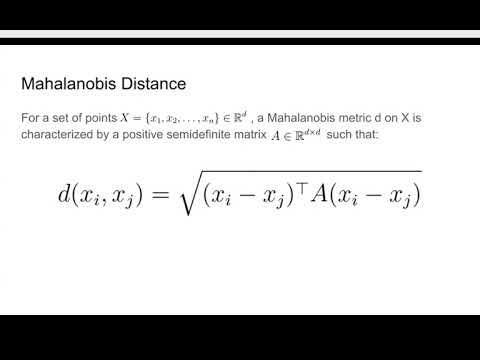

## KNN using Mahalanobis distance

In [ ]:
class KNN_mahalanobis:
    def __init__(self, k=3, epsilon=1e-6):
        self.k = k
        self.epsilon = epsilon  # Small regularization term

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        # Compute the covariance matrix and add small epsilon to diagonal
        cov_matrix = np.cov(x_train, rowvar=False)
        cov_matrix += self.epsilon * np.eye(cov_matrix.shape[0])  # Regularization
        self.cov_matrix_inv = np.linalg.inv(cov_matrix)

    def mahalanobis_distance(self, x, y):
        diff = x - y
        return np.sqrt(np.dot(np.dot(diff.T, self.cov_matrix_inv), diff))

    def predict(self, x_test):
        predictions = [self._predict(x) for x in x_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.mahalanobis_distance(x, x_train_) for x_train_ in self.x_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote
        label_counts = {}
        for label in k_nearest_labels:
            label_counts[label] = label_counts.get(label, 0) + 1

        # Return the most common label
        majority_label = max(label_counts, key=label_counts.get)
        return majority_label


## Centroid Based Classifier using Mahalanobis distance

In [ ]:
class CentroidClassifier_mahalanobis:
    def __init__(self):
        self.centroids = {}
        self.cov_matrix_inv = None

    def fit(self, x_train, y_train):
        self.classes = np.unique(y_train)
        self.centroids = {}

        # Compute class centroids
        for c in self.classes:
            class_indices = np.where(y_train == c)[0]  # Get indices for class c
            self.centroids[c] = np.mean(x_train[class_indices], axis=0)

        # Compute the covariance matrix for the whole dataset
        cov_matrix = np.cov(x_train, rowvar=False)
        self.cov_matrix_inv = np.linalg.inv(cov_matrix + np.eye(cov_matrix.shape[0]) * 1e-10)  # Add small value for stability

    def mahalanobis_distance(self, x, centroid):
        diff = x - centroid
        return np.sqrt(np.dot(np.dot(diff.T, self.cov_matrix_inv), diff))

    def predict(self, x):
        predictions = []
        for x_ in x:
            distances = {c: self.mahalanobis_distance(x_, centroid) for c, centroid in self.centroids.items()}
            predicted_class = min(distances, key=distances.get)  # Choose the class with the smallest distance
            predictions.append(predicted_class)
        return np.array(predictions)


In [ ]:
# KNN Mahalanobis distance
for i in range(3, 8, 2):
  print(f"KNN (Mahalanobis) With K = {i}")
  k_fold_cross_validation(KNN_mahalanobis, np.array(x), y, k_neighbors=i, n_folds=5)

KNN (Mahalanobis) With K = 3
Fold 1 Accuracy: 0.9324 | Precision: 0.5351
Fold 2 Accuracy: 0.9442 | Precision: 0.4763
Fold 3 Accuracy: 0.9314 | Precision: 0.4988
Fold 4 Accuracy: 0.9393 | Precision: 0.5466
Fold 5 Accuracy: 0.9373 | Precision: 0.4795

Overall Average Accuracy: 0.9369
Overall Average Precision: 0.5073
KNN (Mahalanobis) With K = 5
Fold 1 Accuracy: 0.9500 | Precision: 0.4783
Fold 2 Accuracy: 0.9354 | Precision: 0.5403
Fold 3 Accuracy: 0.9393 | Precision: 0.5137
Fold 4 Accuracy: 0.9412 | Precision: 0.5657
Fold 5 Accuracy: 0.9432 | Precision: 0.5619

Overall Average Accuracy: 0.9418
Overall Average Precision: 0.5320
KNN (Mahalanobis) With K = 7
Fold 1 Accuracy: 0.9422 | Precision: 0.5129
Fold 2 Accuracy: 0.9510 | Precision: 0.6230
Fold 3 Accuracy: 0.9324 | Precision: 0.5000
Fold 4 Accuracy: 0.9383 | Precision: 0.5109
Fold 5 Accuracy: 0.9363 | Precision: 0.5737

Overall Average Accuracy: 0.9401
Overall Average Precision: 0.5441


In [ ]:
# Centroid Classifier mahalanobis distance
k_fold_cross_validation(CentroidClassifier_mahalanobis, np.array(x), y, 5)

Fold 1 Accuracy: 0.7796 | Precision: 0.5607
Fold 2 Accuracy: 0.7659 | Precision: 0.5845
Fold 3 Accuracy: 0.7522 | Precision: 0.5522
Fold 4 Accuracy: 0.7777 | Precision: 0.5706
Fold 5 Accuracy: 0.7600 | Precision: 0.5462

Overall Average Accuracy: 0.7671
Overall Average Precision: 0.5628


(0.7670910871694417, 0.5628293739347416)